In [27]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [28]:
df_US = df[df['job_country'] == 'United States'].dropna(subset='salary_year_avg')



In [29]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()


job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [30]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]


In [31]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

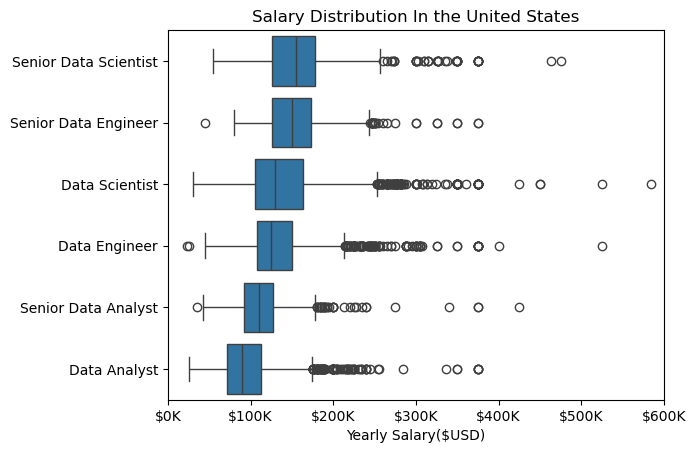

In [33]:
sns.boxplot(data=df_US_top6,x='salary_year_avg',y='job_title_short', order= job_order)
plt.title('Salary Distribution In the United States')
plt.xlabel('Yearly Salary($USD)')
plt.ylabel('')
plt.xlim(0,600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
plt.show()

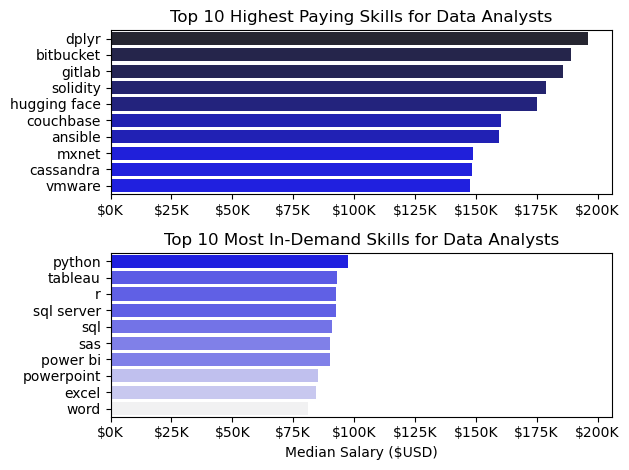

In [34]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US = df_DA_US.explode('job_skills')

df_grouped = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_top_pay = df_grouped.sort_values(by='median',ascending=False).head(10)

df_DA_skills = df_grouped.sort_values(by='count',ascending = False).head(10).sort_values(by='median',ascending=False).head(10)


fig, ax = plt.subplots(2,1)

  #df_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)

sns.barplot(data=df_top_pay, x='median', y=df_top_pay.index, ax=ax[0],hue='median',palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paying Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
   #df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1],hue='median',palette='light:b')
ax[1].legend().remove()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')

ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
plt.tight_layout()
plt.show()